### Testing Simulation Library

In [1]:
import simulation_library
import potentials
import integrators
import data_logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import visuals

plt.style.use("ggplot")
%matplotlib inline
system_builder = simulation_library.SystemFactory()

# Double Well Potential Simulation

In [2]:
# Build system 
system_dw = simulation_library.System(dim = 2)

# Define potentials used in system
wca = potentials.WCAPotential(1,1) # needed for making a particle object
system_dw.central_potential = potentials.DoubleWellPotential(a = 1,
                                                          b = 6,
                                                          c = 1,
                                                          d = 1)

# Place particles
system_dw.add_particle(simulation_library.Particle(wca, np.array([0,1])))

# Choose integration method w/ kwargs
system_dw.get_integrator("metropolis", None, temp = 0.5)

# Build and attach data logging objects
coords_logger_dw = data_logging.CoordinateLogger(system_dw, 100)
energy_logger_dw = data_logging.EnergyLogger(system_dw, 100)
system_dw.registerObserver(coords_logger_dw)
system_dw.registerObserver(energy_logger_dw)

In [3]:
# Run system
system_dw.run(100000)

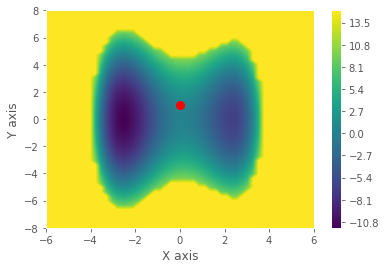

In [4]:
# Visual Trajectory
x_traj = np.array(coords_logger_dw.coordinates)
ani = visuals.make_2D_traj_potential(x_traj,
                               potential=system_dw.central_potential,
                              xlim = [-6, 6],
                              ylim = [-8, 8],
                              cutoff = 10)
ani

(array([  3.,   5.,  25.,  31.,  54.,  55.,  85., 109., 140., 121., 106.,
         83.,  55.,  46.,  28.,  25.,  10.,  10.,   3.,   5.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.05193501, -2.99089631, -2.92985761, -2.86881891, -2.80778021,
        -2.74674151, -2.68570281, -2.62466411, -2.56362541, -2.50258671,
        -2.44154801, -2.38050931, -2.31947061, -2.25843191, -2.19739321,
        -2.13635451, -2.07531581, -2.01427711, -1.95323841, -1.89219971,
        -1.83116101, -1.77012231, -1.70908361, -1.64804491, -1.58700621,
        -1.52596751, -1.46492881, -1.40389011, -1.3428514 , -1.2818127 ,
        -1.220774  , -1.1597353 , -1.0986966 , -1.0376579 , -0.9766192 ,
        -0.9155805 , -0.8545418 , -0.7935031 , -0.7324644 , -0.6714257 ,
        -0.610387  , -0.5493483 , -0.4883096 , -0.4272709 , -0.3662322 ,
 

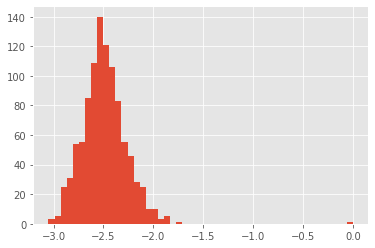

In [5]:
#Output data is in Data logging objects
plt.hist(np.array(coords_logger_dw.coordinates)[:,:,0], bins=50)

Text(0, 0.5, 'Energy')

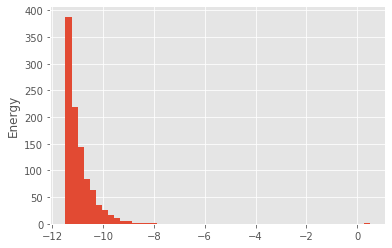

In [6]:
plt.hist(energy_logger_dw.H, bins=50)
plt.ylabel("Energy")

# Mueller Potential

In [25]:
# Build system 
system_mp = simulation_library.System(dim = 2)

# Add potentials + Particles to System
system_mp.central_potential = potentials.MuellerPotential(alpha = 0.1,
                             A = [-200, -100, -170, 15],
                             a = [-1, -1, -6.5, 0.7],
                             b = [0, 0, 11, 0.6],
                             c = [-10, -10, -6.5, 0.7],
                             xj = [1, 0, -0.5, -1],
                             yj = [0, 0.5, 1.5, 1]
                            )
system_mp.add_particle(simulation_library.Particle(wca, np.array([0,1.5])))

# Add integrator & thermostat (This integrator needs a thermostat to be in NPT Ensemble)
system_mp.get_integrator("verlet", dt = 0.0001)
system_mp.get_thermostat("anderson", T = 1, freq = 100, colisions = 0.01)

# Create and add coordinate + energy loggers
coords_logger_mp = data_logging.CoordinateLogger(system_mp, 500)
energy_logger_mp = data_logging.EnergyLogger(system_mp, 500)
system_mp.registerObserver(coords_logger_mp)
system_mp.registerObserver(energy_logger_mp)

In [39]:
system_mp.run(100000)

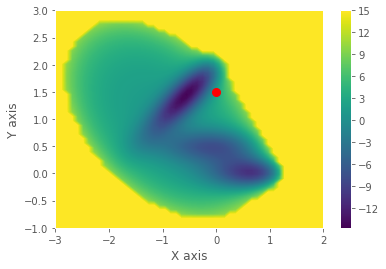

In [40]:
x_traj = np.array(coords_logger_mp.coordinates)
visuals.make_2D_traj_potential(x_traj,
                               potential=system_mp.central_potential,
                              xlim = [-3, 2],
                              ylim = [-1, 3],
                              cutoff = 10)

Text(0, 0.5, 'Counts')

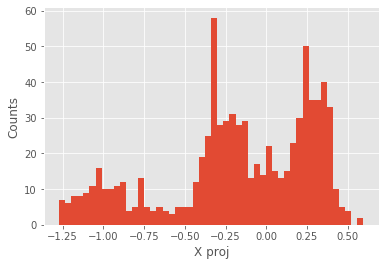

In [41]:
# Project xy coordinates to the (1, -1) vector
xy_data = np.array(coords_logger_mp.coordinates).reshape(-1,2)
x_proj = np.dot(xy_data, np.array([1,-1]))/np.dot([1,-1],[1,-1])
plt.hist(x_proj, bins=50)
plt.xlabel("X proj")
plt.ylabel("Counts")

(array([ 36.,  47.,  21.,   8.,  23.,   0.,   9.,   1.,  66., 108.,  13.,
         42.,  47.,  27.,   0.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,
          4.,   0.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,  48.,  26.,
          8.,   0.,   0.,   0.,   0.,   0.,  43.]),
 array([-10.09011284,  -9.80012841,  -9.51014397,  -9.22015953,
         -8.93017509,  -8.64019066,  -8.35020622,  -8.06022178,
         -7.77023735,  -7.48025291,  -7.19026847,  -6.90028404,
         -6.6102996 ,  -6.32031516,  -6.03033073,  -5.74034629,
         -5.45036185,  -5.16037742,  -4.87039298,  -4.58040854,
         -4.29042411,  -4.00043967,  -3.71045523,  -3.4204708 ,
         -3.13048636,  -2.84050192,  -2.55051749,  -2.26053305,
         -1.97054861,  -1.68056418,  -1.39057974,  -1.1005953 ,
         -0.81061087,  -0.52062643,  -0.23064199,   0.05934244,
          0.34932688,   0.63931132,   0.92929575,   1.21928019,
          1.50926463]),
 <a list of 40 Patch objects>)

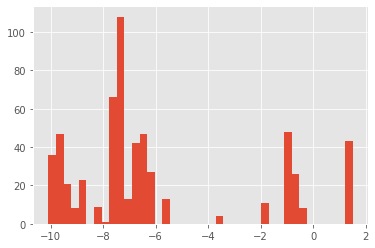

In [37]:
plt.hist(energy_logger_mp.H, bins=40)

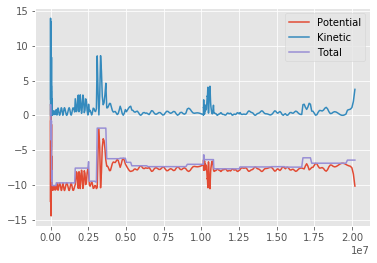

In [33]:
plt.plot(energy_logger_mp.steps, energy_logger_mp.U)
plt.plot(energy_logger_mp.steps, energy_logger_mp.K)
plt.plot(energy_logger_mp.steps, energy_logger_mp.H)
plt.legend(["Potential", "Kinetic", "Total"])

# Mueller Potential using a different Integrator

In [13]:
system_mp2 = simulation_library.System(dim = 2)
system_mp2.central_potential = potentials.MuellerPotential(alpha = 0.1,
                             A = [-200, -100, -170, 15],
                             a = [-1, -1, -6.5, 0.7],
                             b = [0, 0, 11, 0.6],
                             c = [-10, -10, -6.5, 0.7],
                             xj = [1, 0, -0.5, -1],
                             yj = [0, 0.5, 1.5, 1]
                            )
system_mp2.add_particle(simulation_library.Particle(wca, np.array([0,1.5])))

system_mp2.get_integrator("metropolis", dt = None, temp = 1)
coords_logger_mp2 = data_logging.CoordinateLogger(system_mp2, 500)
energy_logger_mp2 = data_logging.EnergyLogger(system_mp2, 500)
system_mp2.registerObserver(coords_logger_mp2)
system_mp2.registerObserver(energy_logger_mp2)

In [14]:
system_mp2.run(100000)

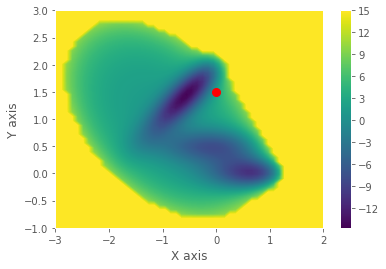

In [15]:
x_traj = np.array(coords_logger_mp2.coordinates)
visuals.make_2D_traj_potential(x_traj,
                               potential=system_mp2.central_potential,
                              xlim = [-3, 2],
                              ylim = [-1, 3],
                              cutoff = 10)

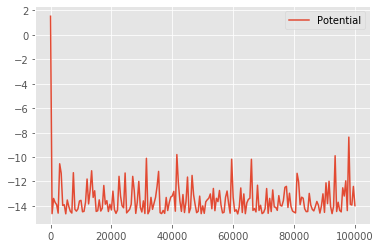

In [16]:
plt.plot(energy_logger_mp2.steps, energy_logger_mp2.H)
plt.legend(["Potential"])

In [17]:
coords = np.array(coords_logger_mp2.coordinates)


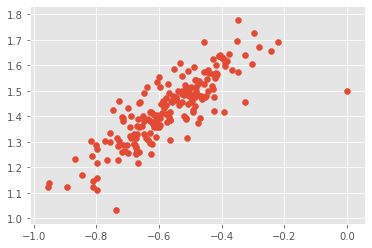

In [18]:
plt.scatter(*coords.T.squeeze())